## Visualizing Two Quantitative Variables

In this chapter, you will create and customize plots that visualize the relationship between two quantitative variables. To do this, you will use scatter plots and line plots to explore how the level of air pollution in a city changes over the course of a day and how horsepower relates to fuel efficiency in cars. You will also see another big advantage of using Seaborn - the ability to easily create subplots in a single figure!

### Creating subplots with col and row

We've seen in prior exercises that students with more absences (`"absences"`) tend to have lower final grades (`"G3"`). Does this relationship hold regardless of how much time students study each week?

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time (`"study_time"`).

Seaborn has been imported as sns and matplotlib.pyplot has been imported as plt.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

csv_path = 'student-alcohol-consumption.csv'

student_data = pd.read_csv(csv_path)


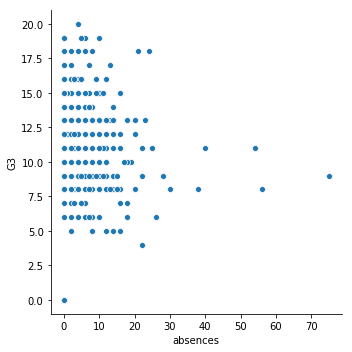

In [2]:
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind='scatter')
plt.show()

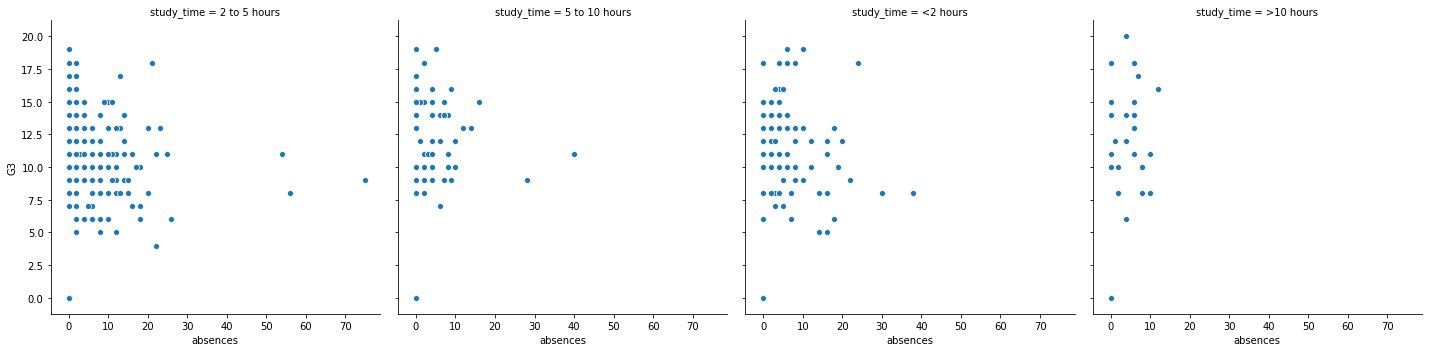

In [3]:
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter",
            col="study_time")

# Show plot
plt.show()

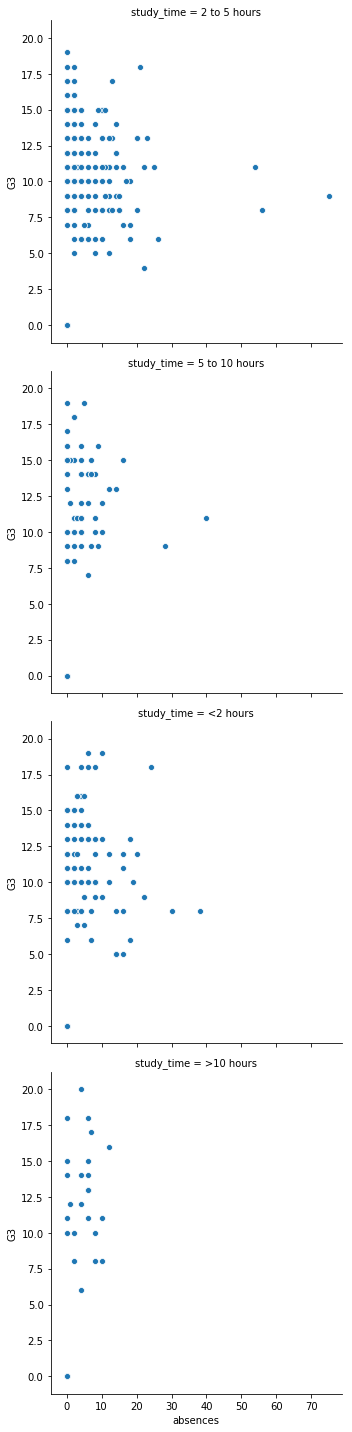

In [4]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            row="study_time")


### Creating two-factor subplots

Let's continue looking at the `student_data` dataset of students in secondary school. Here, we want to answer the following question: does a student's first semester grade (`"G1"`) tend to correlate with their final grade (`"G3"`)?

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school (`"schoolsup"`) or from their family (`"famsup"`), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.

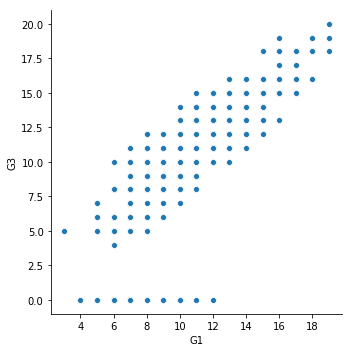

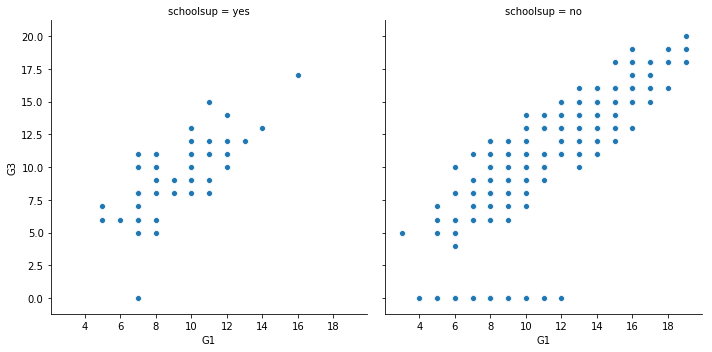

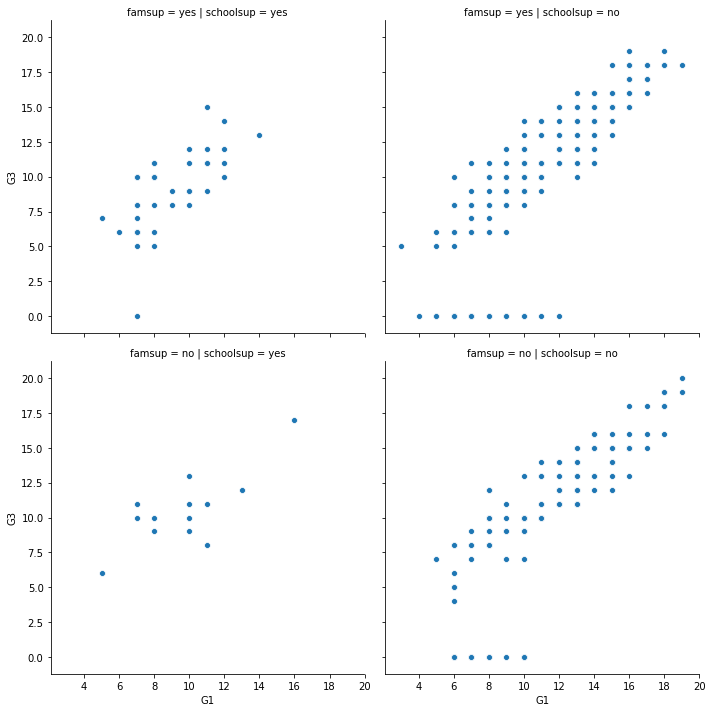

In [10]:
# Use relplot() to create a scatter plot with "G1" on the x-axis and "G3" on the y-axis, using the student_data DataFrame.
sns.relplot(data=student_data, x="G1", y="G3", kind="scatter")

# Show plot
plt.show()

# Adjust to add subplots based on school support
# Create column subplots based on whether the student received support from the school ("schoolsup"), 
# ordered so that "yes" comes before "no".
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter",
            col="schoolsup",
            col_order = ["yes", "no"])
# Show plot
plt.show()

# Adjust further to add subplots based on family support
# Add row subplots based on whether the student received support from the family ("famsup"),
# ordered so that "yes" comes before "no". This will result in subplots based on two factors.
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"],
            row="famsup",
            row_order=["yes", "no"])

# Show plot
plt.show()

### Changing the size of scatter plot points

In this exercise, we'll explore Seaborn's `mpg` dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.

What is the relationship between the power of a car's engine (`"horsepower"`) and its fuel efficiency (`"mpg"`)? And how does this relationship vary by the number of cylinders (`"cylinders"`) the car has? Let's find out.

Let's continue to use `relplot()` instead of `scatterplot()` since it offers more flexibility.

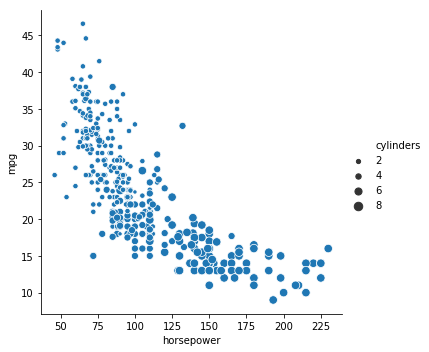

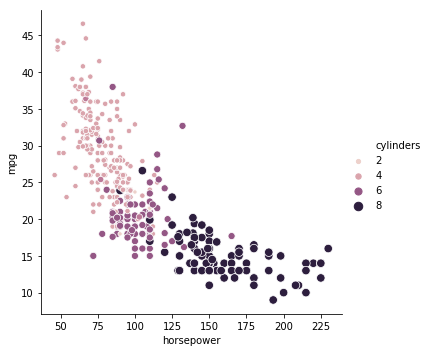

In [8]:
mpg = pd.read_csv("mpg.csv")

# Create scatter plot of horsepower vs. mpg
# Use relplot() and the mpg DataFrame to create a scatter plot with "horsepower" on the x-axis and "mpg" on the y-axis. 
# Vary the size of the points by the number of cylinders in the car ("cylinders").
sns.relplot(data=mpg, x="horsepower", y="mpg", kind="scatter", size="cylinders" )

# To make this plot easier to read, use hue to vary the color of the points by the number of cylinders in the car ("cylinders").
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders",
            hue="cylinders")


### Changing the style of scatter plot points

Let's continue exploring Seaborn's `mpg` dataset by looking at the relationship between how fast a car can accelerate (`"acceleration"`) and its fuel efficiency (`"mpg"`). Do these properties vary by country of origin (`"origin"`)?

Note that the `"acceleration"` variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

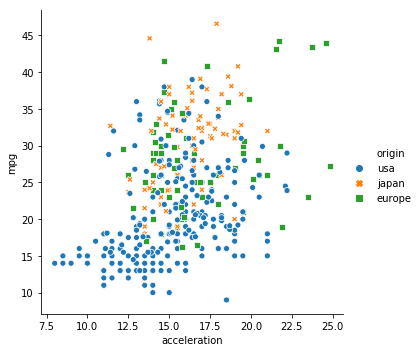

In [11]:
# Create a scatter plot of acceleration vs. mpg
# Use relplot() and the mpg DataFrame to create a scatter plot 
# with "acceleration" on the x-axis and "mpg" on the y-axis. 
# Vary the style and color of the plot points by country of origin ("origin").
sns.relplot(data=mpg, x="acceleration", y="mpg", kind="scatter", style="origin", hue="origin")

### Interpreting line plots

Shaded region is the condence interval  
* Assumes dataset is a random sample  
* 95% condent that the mean is within this interval  
* Indicates uncertainty in our estimate

In this exercise, we'll continue to explore Seaborn's `mpg` dataset, which contains one row per car model and includes information such as the year the car was made, its fuel efficiency (measured in "miles per gallon" or "M.P.G"), and its country of origin (USA, Europe, or Japan).

How has the average miles per gallon achieved by these cars changed over time? Let's use line plots to find out!

C:\Users\Jacob\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


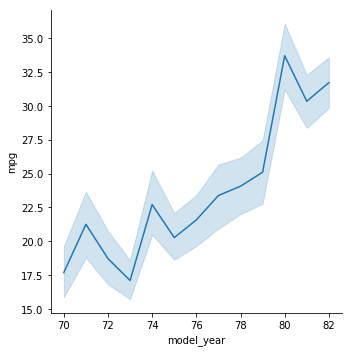

In [13]:
# Create line plot
# Use relplot() and the mpg DataFrame to create a line plot with "model_year" on the x-axis and "mpg" on the y-axis.

sns.relplot(data=mpg, x="model_year", y="mpg", kind="line")

### Visualizing standard deviation with line plots

In the last exercise, we looked at how the average miles per gallon achieved by cars has changed over time. Now let's use a line plot to visualize how the *distribution* of miles per gallon has changed over time.

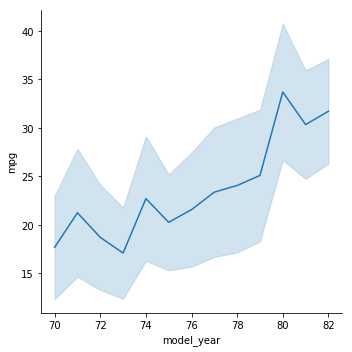

In [15]:
# Change the plot so the shaded area shows the standard deviation instead of the confidence interval for the mean.
sns.relplot(data=mpg, x="model_year", y="mpg", kind="line", ci="sd")

### Plotting subgroups in line plots

Let's continue to look at the `mpg` dataset. We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

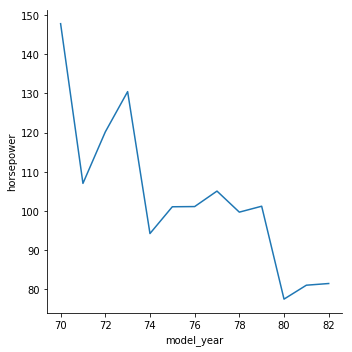

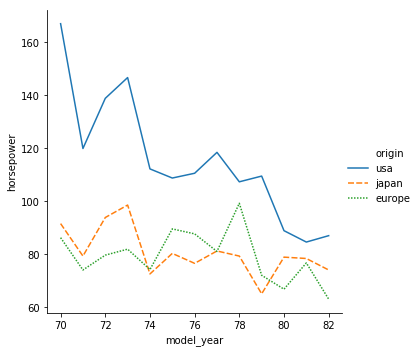

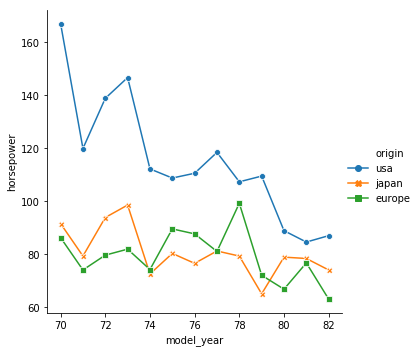

In [18]:
# Create line plot of model year vs. horsepower
# Use relplot() and the mpg DataFrame to create a line plot 
# with "model_year" on the x-axis and "horsepower" on the y-axis. 
# Turn off the confidence intervals on the plot.
sns.relplot(data=mpg, x="model_year", y="horsepower", kind="line", ci=None)

# Create different lines for each country of origin ("origin") that vary in both line style and color.
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None,
            hue="origin",
            style="origin")

# Add markers and make each line have the same style
# Use the dashes parameter to use solid lines for all countries,
# while still allowing for different marker styles for each line.
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin",
            markers=True,
            dashes=False)